# Room Cancellation Classification

In this assignment, you will be performing EDA and predictive modelling on a dataset of hotel reservations. The dataset is available from the attached `hotel_bookings.csv` file.

In this Jupyter notebook, please, document your results and the way you have obtained them. The results of each sub-question should be printed as the result of its corresponding cell.
Please make sure that the datasets and other outputs are easily identifiable, i.e. use descriptive names for as is suitable for each corresponding question.
Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner. _Please do not change the general structure of this notebook_. You can, however, **add additional markdown or code cells** if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

**Submission instructions**:
For submission, make a zip file containing your notebook and the attached dataset and name it as `<your_roll_number>_a3.zip` 

In [1]:
# Add all imports here

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib import rcParams
from matplotlib import pyplot as plt
# add more when required

rcParams["figure.figsize"] = 20, 10

In [2]:
data = pd.read_csv("hotel_bookings.csv")
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Data Description

[Original Source](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

This data consists of room reservations for two hotels: (i) a city hotel and (ii) a resort hotel. The columns are described as follows:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|


## Part 0

The `children`, `adults` and `babies` columns cannot have a value of zero simultaneously. Filter out the rows, which show this behavior

In [3]:
data_filtered = data[(data['adults']!=0) | (data['children']!=0) | (data['babies']!=0)]
data_filtered

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Part A - EDA

To make ourselves familiar with the data, we will start with an explorative data analysis. In this part, you will be making different visualizations to support your answers.

For each sub-question, a separate and single subplot should be shown. You also need to decide the optimal visualization for each case and use that.

### Question 1

#### (a)
Determine and visualize the top 10 countries and guest counts from which the maximum number of guests are coming from.

#### (b)
Repeat (a) but show the guest counts for the city and resort hotels separately. They both should be shown in the same plot

#### (c)
Repeat (b) for the non-cancelled bookings


Each part should be done in a separate cell

Top 10 countries according to guest count
  country    count
0     PRT  90027.0
1     GBR  24568.0
2     FRA  21579.0
3     ESP  18153.0
4     DEU  14198.0
5     ITA   7856.0
6     IRL   6909.0
7     BEL   4911.0
8     BRA   4867.0
9     USA   4318.0


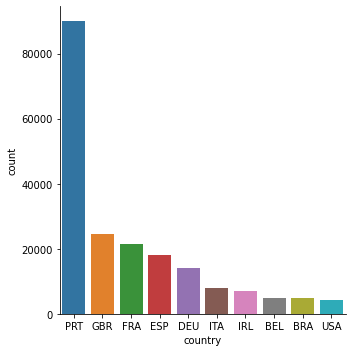

In [4]:
# Your code here (a)  
data_filtered_C = data_filtered.copy()
data_filtered_C['guest_count'] = data_filtered_C["children"] + data_filtered_C["adults"] + data_filtered_C["babies"] 
Top10_Countries = data_filtered_C[['country','guest_count']].groupby('country')['guest_count'].sum().sort_values(ascending=False)[:10]


result = pd.DataFrame({'country' :pd.Series(Top10_Countries.index), 'count': pd.Series(Top10_Countries.values)})
print('Top 10 countries according to guest count')
print(result)

sns.catplot(x= "country", y="count", data = result, kind='bar')

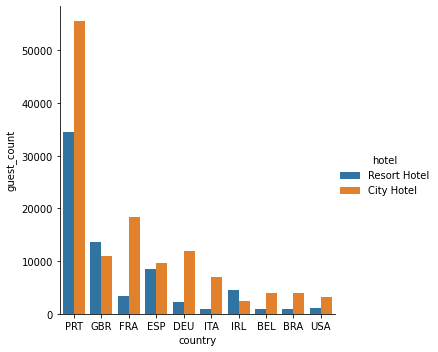

In [6]:
from pandas.api.types import CategoricalDtype

# Your code here (b)
data_filtered_C= data_filtered.copy()
data_filtered_C['guest_count'] = data_filtered_C["children"] + data_filtered_C["adults"] + data_filtered_C["babies"]
Top10_Countries = data_filtered_C[['country','guest_count']].groupby('country')['guest_count'].sum().sort_values(ascending=False)[:10].index
data_filtered_Sub = data_filtered_C[data_filtered_C['country'].isin(Top10_Countries)]

Top10_Countries_hotel = data_filtered_Sub[['country','guest_count','hotel']].groupby(['country','hotel'])['guest_count'].sum()
Top10_Countries_hotel = pd.DataFrame(Top10_Countries_hotel).reset_index()

C_order = CategoricalDtype(Top10_Countries.values, ordered=True)
Top10_Countries_hotel['country'] = Top10_Countries_hotel['country'].astype(C_order)
Top10_Countries_hotel = Top10_Countries_hotel.sort_values('country')

sns.catplot(x= "country", y="guest_count", data = Top10_Countries_hotel, hue = 'hotel',kind='bar')

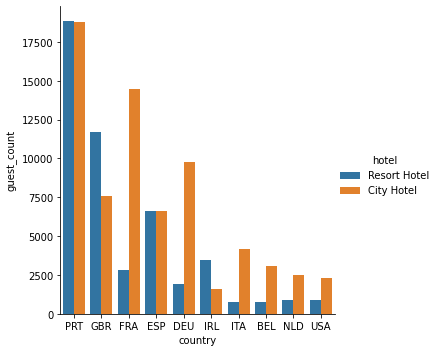

In [9]:
# Your code here (c)

data_filtered_C = data_filtered[data_filtered['is_canceled'] == 0].copy()
data_filtered_C['guest_count'] = data_filtered_C["children"] + data_filtered_C["adults"] + data_filtered_C["babies"]

Top10_Countries = data_filtered_C[['country','guest_count']].groupby('country')['guest_count'].sum().sort_values(ascending=False)[:10].index

data_filtered_Sub = data_filtered_C[data_filtered_C['country'].isin(Top10_Countries)]

Top10_Countries_hotel = data_filtered_Sub[['country','guest_count','hotel']].groupby(['country','hotel'])['guest_count'].sum()
Top10_Countries_hotel = pd.DataFrame(Top10_Countries_hotel).reset_index()

C_order = CategoricalDtype(Top10_Countries.values, ordered=True)
Top10_Countries_hotel['country'] = Top10_Countries_hotel['country'].astype(C_order)
Top10_Countries_hotel = Top10_Countries_hotel.sort_values('country')


sns.catplot(x= "country", y="guest_count", data = Top10_Countries_hotel, hue = 'hotel',kind='bar')

### Question 2
Consider the non-cancelled bookings only.

#### (a)
Plot the distribution of the average amount (adr), the guests are charged per night for each room type.

#### (b)
Repeat (a) but separate the results for each hotel. A single plot should be shown


Top 10 countries according to guest count
  Room_Type  Average_Amount
0         G      158.108185
1         H      157.962646
2         F      142.025103
3         E      111.495231
4         C      106.808841
5         D      100.886631
6         B       94.926598
7         A       92.741980
8         K       71.760511
9         I       40.558729


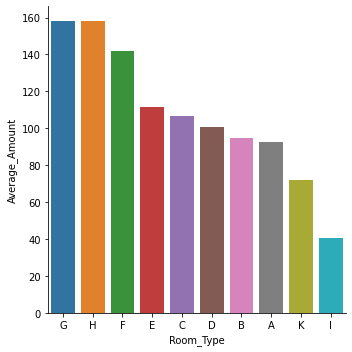

In [10]:
# Your code here (a)
data_filtered_C = data_filtered[data_filtered['is_canceled'] == 0].copy()
AvgAmn_PerN = data_filtered_C[['assigned_room_type','adr']].groupby('assigned_room_type')['adr'].mean().sort_values(ascending=False)

result = pd.DataFrame({'Room_Type' :pd.Series(AvgAmn_PerN.index), 'Average_Amount': pd.Series(AvgAmn_PerN.values)})
print('Top 10 countries according to guest count')
print(result)

sns.catplot(x= "Room_Type", y="Average_Amount", data = result, kind='bar')


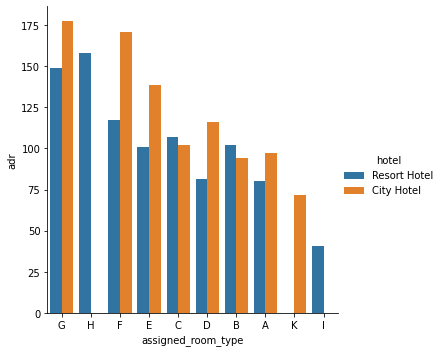

In [13]:
# Your code here (b)
data_filtered_C = data_filtered[data_filtered['is_canceled'] == 0].copy()

Room_order = data_filtered_C[['assigned_room_type','adr']].groupby('assigned_room_type')['adr'].mean().sort_values(ascending=False)
Room_order = CategoricalDtype(Room_order.index, ordered=True)

AvgAmn_PerN = data_filtered_C[['hotel','assigned_room_type','adr']].groupby(['assigned_room_type','hotel'])['adr'].mean()

AvgAmn_PerN = pd.DataFrame(AvgAmn_PerN)
AvgAmn_PerN = AvgAmn_PerN.reset_index()

AvgAmn_PerN['assigned_room_type'] = AvgAmn_PerN['assigned_room_type'].astype(Room_order)
AvgAmn_PerN = AvgAmn_PerN.sort_values('assigned_room_type')


sns.catplot(x= "assigned_room_type", y="adr", data = AvgAmn_PerN, hue = 'hotel',kind='bar')

### Question 3
Consider the non-cancelled bookings only.

#### (a)
Plot the mean values for `adr` by month. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

#### (b)
Plot the mean values for `adr` by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.



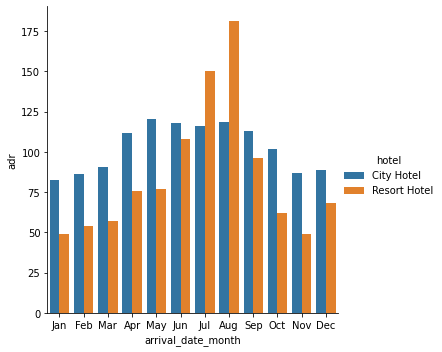

In [14]:
# Your code here (a)
data_filtered_C = data_filtered[data_filtered['is_canceled'] == 0].copy()

month_list= ['January','February','March','April','May','June','July','August','September','October','November','December']
month_order = CategoricalDtype(month_list, ordered=True)

months = { 'January' :'Jan',
          'February':'Feb',
          'March':'Mar',
          'April':'Apr',
          'May':'May',
          'June':'Jun',
          'July':'Jul',
          'August':'Aug',
          'September':'Sep',
          'October':'Oct',
          'November': 'Nov',
          'December': 'Dec'}

month_order = CategoricalDtype(month_list, ordered=True)

AvgAmn_PerN = data_filtered_C[['hotel','arrival_date_month','adr']].groupby(['arrival_date_month','hotel'])['adr'].mean()

AvgAmn_PerN = pd.DataFrame(AvgAmn_PerN)
AvgAmn_PerN = AvgAmn_PerN.reset_index()

AvgAmn_PerN['arrival_date_month'] = AvgAmn_PerN['arrival_date_month'].astype(month_order)
AvgAmn_PerN = AvgAmn_PerN.sort_values('arrival_date_month')

AvgAmn_PerN['arrival_date_month'] = AvgAmn_PerN['arrival_date_month'].map(months)


sns.catplot(x= "arrival_date_month", y="adr", data = AvgAmn_PerN, hue = 'hotel',kind='bar')



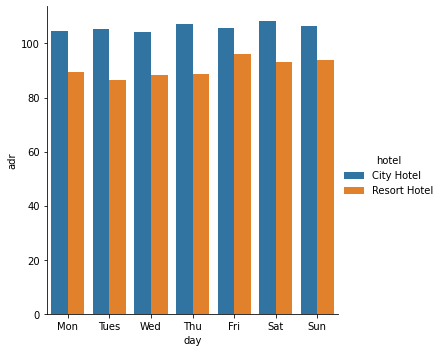

In [17]:
# Your code here (B)

data_filtered_C= data_filtered[data_filtered['is_canceled'] == 0].copy()
months = { 'January' :1,
          'February':2,
          'March':3,
          'April':4,
          'May':5,
          'June':6,
          'July':7,
          'August':8,
          'September':9,
          'October':10,
          'November': 11,
          'December': 12}
data_filtered_C['arrival_date_month'] = data_filtered_C['arrival_date_month'].map(months)

data_filtered_C['day'] = data_filtered_C['arrival_date_day_of_month'].astype(str)+'/'+data_filtered_C['arrival_date_month'].astype(str)+'/'+data_filtered_C['arrival_date_year'].astype(str)
data_filtered_C['day'] = data_filtered_C['day'].astype('datetime64[ns]').dt.day_name()

day_list= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day= {'Monday':'Mon',
      'Tuesday':'Tues',
      'Wednesday':'Wed',
      'Thursday':'Thu',
      'Friday':'Fri',
      'Saturday':'Sat',
      'Sunday':'Sun'}

Day_order = CategoricalDtype(day_list, ordered=True)

AvgAmn_PerN = data_filtered_C[['hotel','day','adr']].groupby(['day','hotel'])['adr'].mean()

AvgAmn_PerN = pd.DataFrame(AvgAmn_PerN)
AvgAmn_PerN = AvgAmn_PerN.reset_index()

AvgAmn_PerN['day'] = AvgAmn_PerN['day'].astype(Day_order)
AvgAmn_PerN = AvgAmn_PerN.sort_values('day')

AvgAmn_PerN['day'] = AvgAmn_PerN['day'].map(day)


sns.catplot(x= "day", y="adr", data = AvgAmn_PerN, hue = 'hotel',kind='bar')


### Question 4

Consider the non-cancelled bookings only.

#### (a)

Plot the guest counts by month. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

#### (b)
Plot the guest counts by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

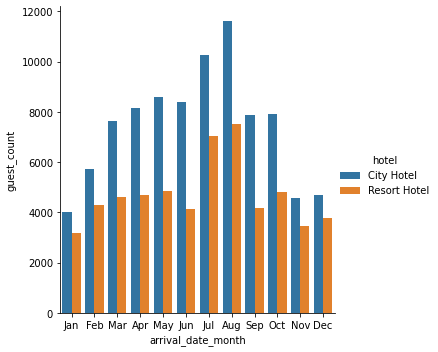

In [19]:
# Your code here (a)

data_filtered_C = data_filtered[data_filtered['is_canceled'] == 0].copy()
data_filtered_C['guest_count'] = data_filtered_C["children"] + data_filtered_C["adults"] + data_filtered_C["babies"]

month_list= ['January','February','March','April','May','June','July','August','September','October','November','December']
Month_order = CategoricalDtype(month_list, ordered=True)

months = { 'January' :'Jan',
          'February':'Feb',
          'March':'Mar',
          'April':'Apr',
          'May':'May',
          'June':'Jun',
          'July':'Jul',
          'August':'Aug',
          'September':'Sep',
          'October':'Oct',
          'November': 'Nov',
          'December': 'Dec'}

Month_order = CategoricalDtype(month_list, ordered=True)

Guest_count = data_filtered_C[['hotel','arrival_date_month','guest_count']].groupby(['arrival_date_month','hotel'])['guest_count'].sum()

Guest_count = pd.DataFrame(Guest_count)
Guest_count = Guest_count.reset_index()

Guest_count['arrival_date_month'] = Guest_count['arrival_date_month'].astype(Month_order)
Guest_count = Guest_count.sort_values('arrival_date_month')

Guest_count['arrival_date_month'] = Guest_count['arrival_date_month'].map(months)


sns.catplot(x= "arrival_date_month", y="guest_count", data = Guest_count, hue = 'hotel',kind='bar')



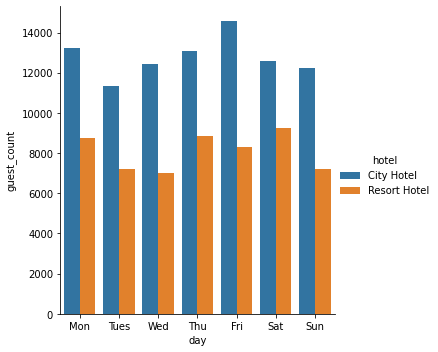

In [21]:
# Your code here (b)
data_filtered_C = data_filtered[data_filtered['is_canceled'] == 0].copy()
data_filtered_C['guest_count'] = data_filtered_C["children"] + data_filtered_C["adults"] + data_filtered_C["babies"]

months = { 'January' :1,
          'February':2,
          'March':3,
          'April':4,
          'May':5,
          'June':6,
          'July':7,
          'August':8,
          'September':9,
          'October':10,
          'November': 11,
          'December': 12}
data_filtered_C['arrival_date_month'] = data_filtered_C['arrival_date_month'].map(months)

data_filtered_C['day'] = data_filtered_C['arrival_date_day_of_month'].astype(str)+'/'+data_filtered_C['arrival_date_month'].astype(str)+'/'+data_filtered_C['arrival_date_year'].astype(str)

data_filtered_C['day'] = data_filtered_C['day'].astype('datetime64[ns]').dt.day_name()

day_list= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day= {'Monday':'Mon',
      'Tuesday':'Tues',
      'Wednesday':'Wed',
      'Thursday':'Thu',
      'Friday':'Fri',
      'Saturday':'Sat',
      'Sunday':'Sun'}
Day_order = CategoricalDtype(day_list, ordered=True)

guest_count = data_filtered_C[['hotel','day','guest_count']].groupby(['day','hotel'])['guest_count'].sum()
guest_count = pd.DataFrame(guest_count)
guest_count = guest_count.reset_index()

guest_count['day'] = guest_count['day'].astype(Day_order)
guest_count = guest_count.sort_values('day')

guest_count['day'] = guest_count['day'].map(day)


sns.catplot(x= "day", y="guest_count", data = guest_count, hue = 'hotel',kind='bar')


### Question 5

Consider the non-cancelled bookings only.

#### (a)
Plot the distribution of stay duration (in number of days) of guests at each hotel.

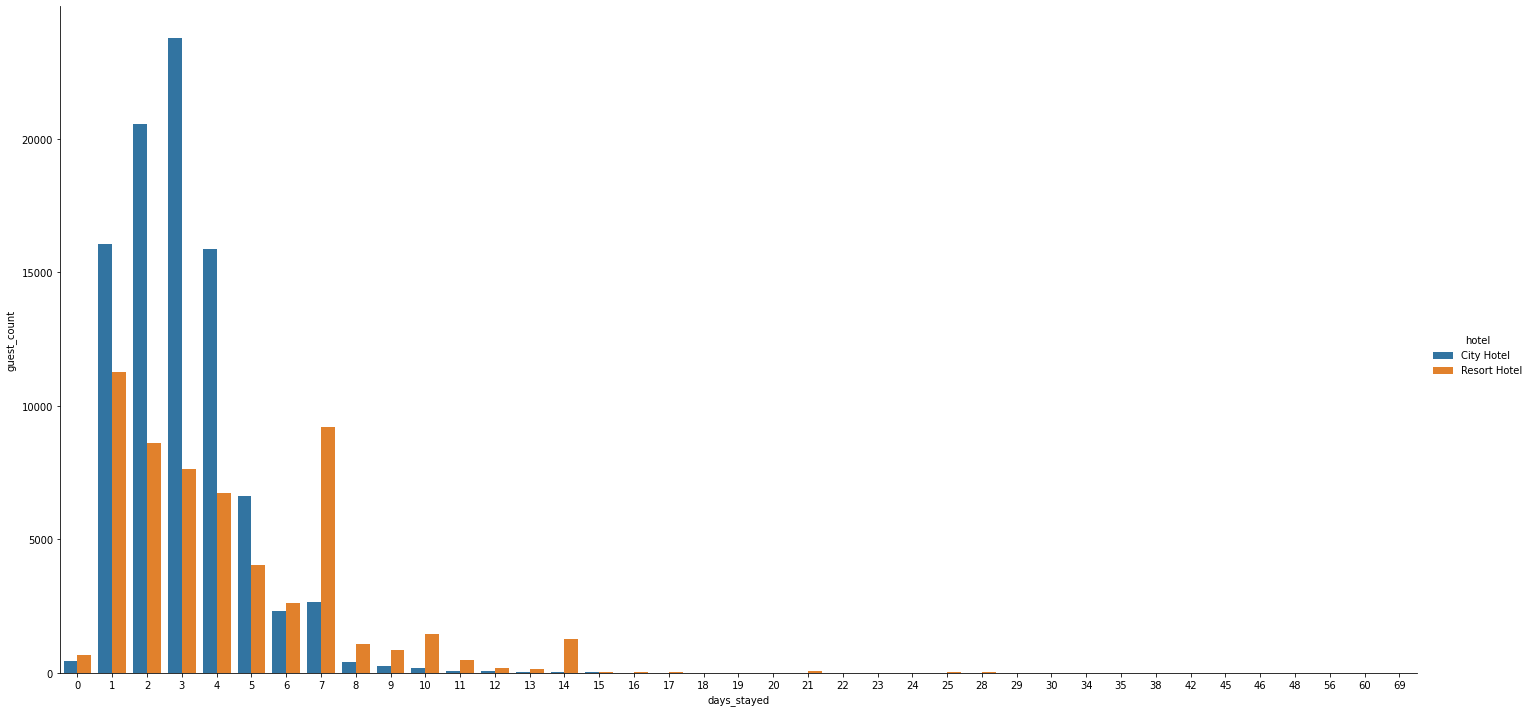

In [28]:
# Your code here (a)
data_filtered_C = data_filtered[data_filtered['is_canceled'] == 0].copy()
data_filtered_C['guest_count'] = data_filtered_C["children"] + data_filtered_C["adults"] + data_filtered_C["babies"]
data_filtered_C['days_stayed'] = data_filtered_C["stays_in_weekend_nights"] + data_filtered_C["stays_in_week_nights"]

stay_days = data_filtered_C[['hotel','days_stayed','guest_count']].groupby(['days_stayed','hotel'])['guest_count'].sum()

stay_days = pd.DataFrame(stay_days)
stay_days = stay_days.reset_index()

sns.catplot(x= "days_stayed", y="guest_count",height=10,aspect=2, data = stay_days, hue = 'hotel',kind='bar')

### Question 6

#### (a), (b) & (c)
Make three visualizations, showing some interesting insights from the data. 

The visualizations should be accompanied by a brief textual description highlighting your finding.

The three visualizations are as follow
#### (a)
total number of canceled and not canceled booking at each hotel 
#### (b)
distribution of canceled bookings according to months at each hostel 
#### (c)
relation between lead time and cacelation of booking

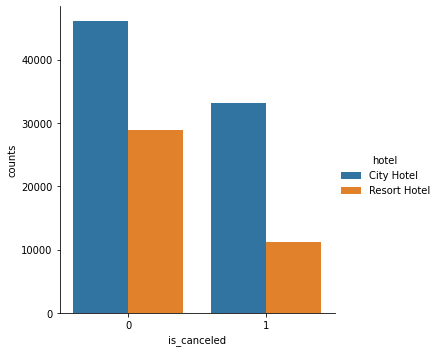

In [29]:
# Your code here (a)
data_filtered_C = data_filtered.copy()

canceled_bookings = data_filtered_C[['hotel','is_canceled']].groupby(['is_canceled','hotel']).size().reset_index(name='counts')

sns.catplot(x= "is_canceled", y="counts", data = canceled_bookings, hue = 'hotel',kind='bar')


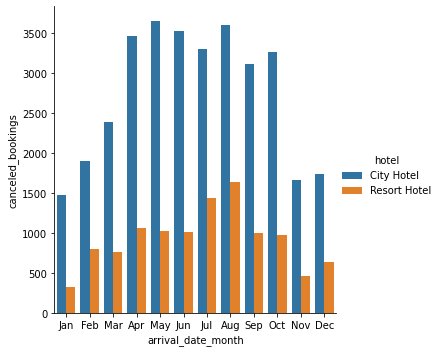

In [30]:
# Your code here (b)

data_filtered_C = data_filtered[data_filtered['is_canceled'] == 1].copy()

month_list= ['January','February','March','April','May','June','July','August','September','October','November','December']
Month_order = CategoricalDtype(month_list, ordered=True)

months = { 'January' :'Jan',
          'February':'Feb',
          'March':'Mar',
          'April':'Apr',
          'May':'May',
          'June':'Jun',
          'July':'Jul',
          'August':'Aug',
          'September':'Sep',
          'October':'Oct',
          'November': 'Nov',
          'December': 'Dec'}

Month_order = CategoricalDtype(month_list, ordered=True)

canceled_bookings = data_filtered_C[['hotel','arrival_date_month']].groupby(['arrival_date_month','hotel']).size().reset_index(name='canceled_bookings')

canceled_bookings['arrival_date_month'] = canceled_bookings['arrival_date_month'].astype(Month_order)
canceled_bookings = canceled_bookings.sort_values('arrival_date_month')

canceled_bookings['arrival_date_month'] = canceled_bookings['arrival_date_month'].map(months)


sns.catplot(x= "arrival_date_month", y="canceled_bookings", data = canceled_bookings, hue = 'hotel',kind='bar')

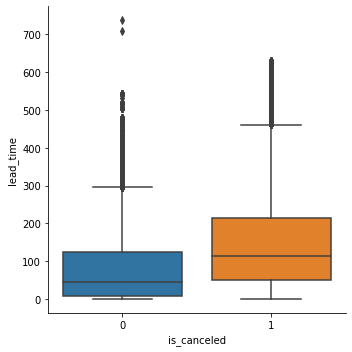

In [31]:
# Your code here (c)

data_filtered_C = data_filtered[['lead_time','is_canceled']].copy()

sns.catplot(y='lead_time', x='is_canceled', data=data_filtered_C, kind='box')

## Part B - Pre-processing

For this part, **you are required to document the reasoning behind all the data transformations you devise and the insights you gain from each question.** Create **markdown cells** to add your answers. 

### Task Description

The task is to classify whether a booking will be cancelled or not. 


### Question 1
**Feature Selection**

#### (a)
List the features which seem to contribute to data leakage. These will be the features which are related to the predicitve target, but would not be available at prediction time in a real-world setting. 

#### (b)
Find out the percent of missing values of each column and visualize using [missingno](https://github.com/ResidentMario/missingno) . Which features have too many missing values? And which features have sufficiently low number of missing values, such that they can be safely imputed without significantly affecting the overall data distribution.

#### (c)
Visualize the correlations among the different input features.

#### (d)
Find out the correlation of each of the input features with the target attribute.

#### (e)
Using your answers to the previous parts, filter out the irrelevant features from the dataset.

Remember to document your findings for each part.

In [21]:
# Your code here (a)

Following features will not be available at real time for prediction and hence contribute to data leakage
* Assigned room type
* booking changes
* days_in_waiting_list
* adr
* reservation_status
* reservation_status_date

In [22]:
# Your code here (b)

In [191]:
#percenttage of missing values
data_f.isnull().sum() / data_f.shape[0] * 100.00

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003355
babies                             0.000000
meal                               0.000000
country                            0.400973
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

<AxesSubplot:>

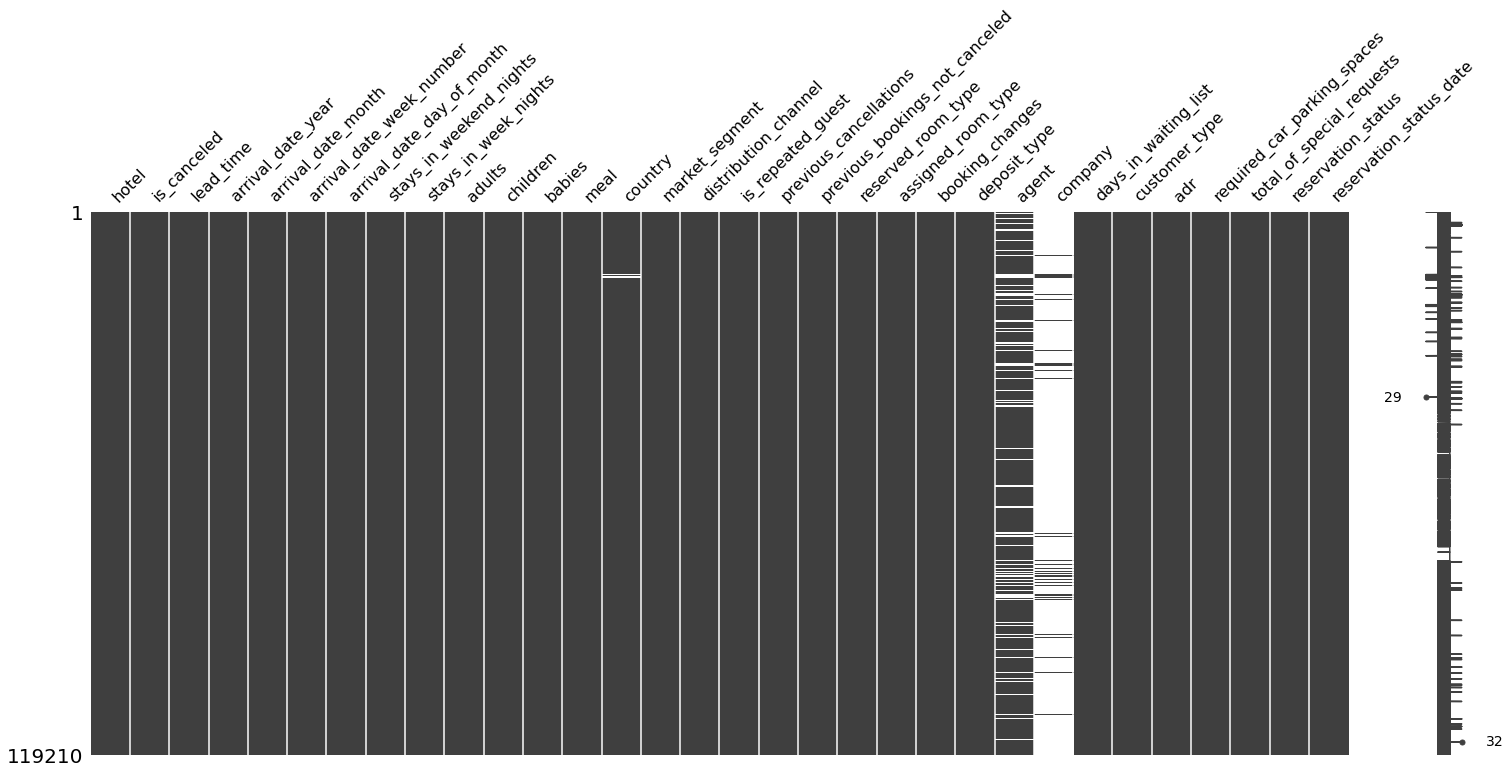

In [33]:
#visualizing missing values using missingno
msno.matrix(data_filtered)
#white lines show missing values

<AxesSubplot:>

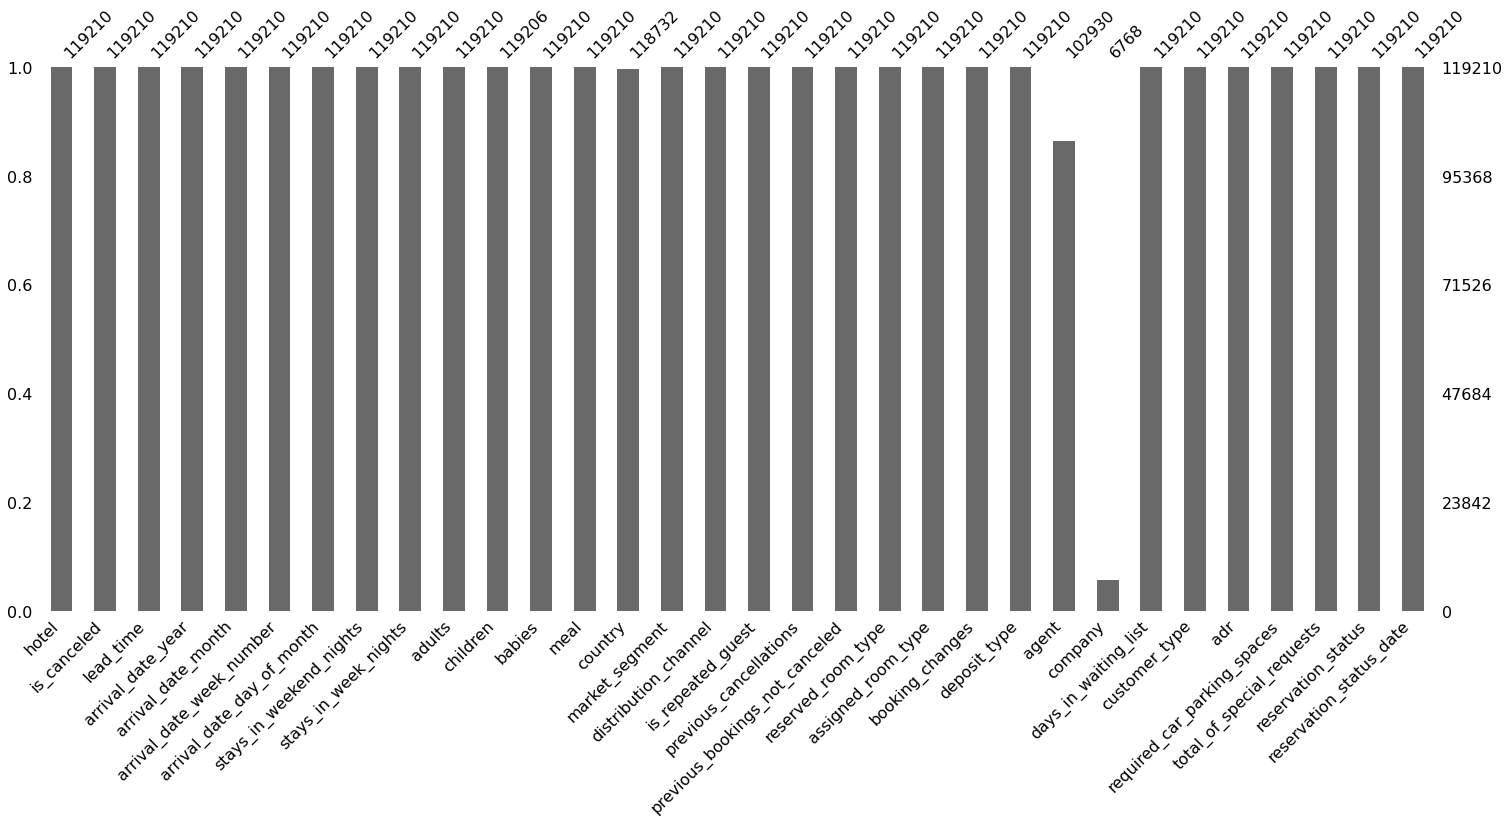

In [34]:
msno.bar(data_filtered)

Almost all the features have very few or no missig vales except the following features 
* company
* agent

The percentage of missing values for **comapny** is around 94% and for **agent** it is around 13%. Therefore **company** feature cannot be safely imputed without significantly affecting the overall data distribution.

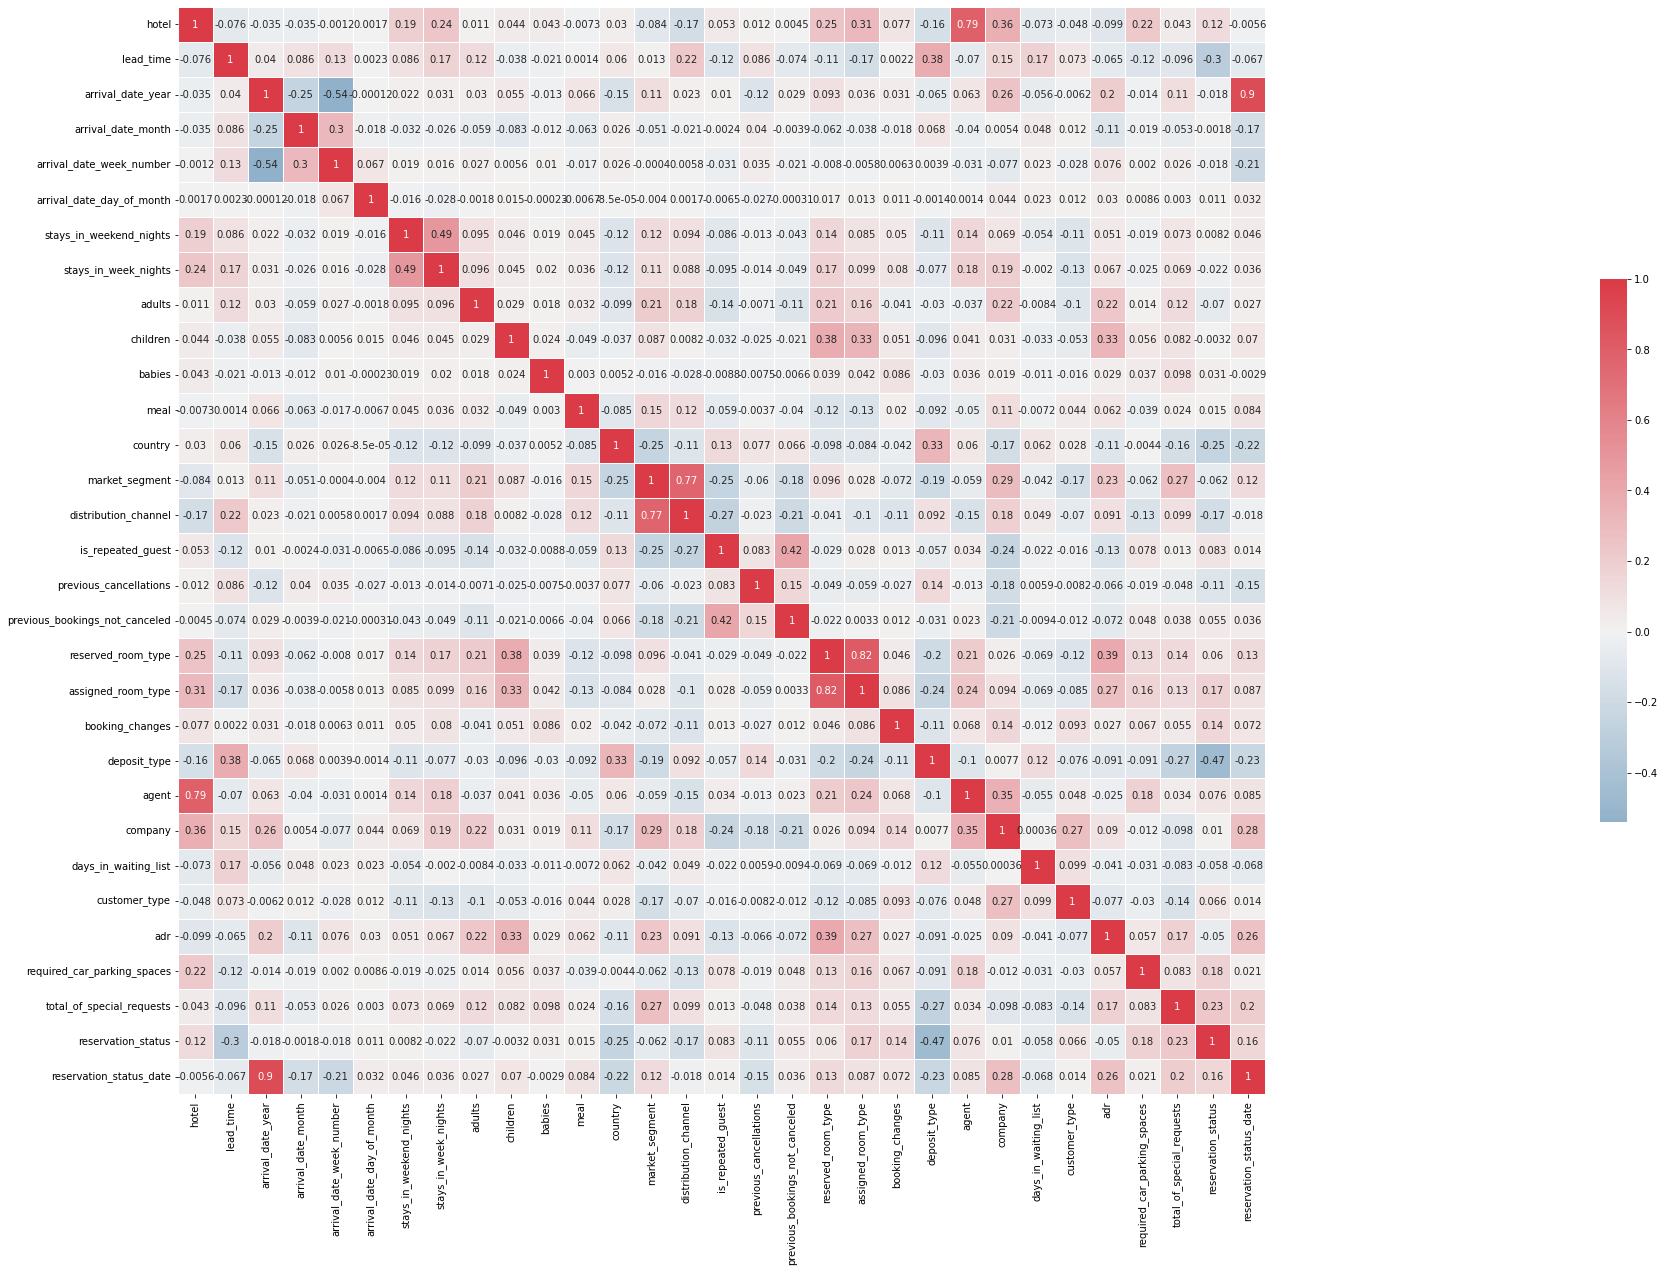

In [37]:
# Your code here (c)
data_filtered_C = data_filtered.drop(['is_canceled'], axis=1).copy()


cat_columns = data_filtered_C.select_dtypes(['object']).columns
data_filtered_C[cat_columns] = data_filtered_C[cat_columns].astype('category')

data_filtered_C[cat_columns] = data_filtered_C[cat_columns].apply(lambda x: x.cat.codes)

corr = data_filtered_C.corr()
cmap = sns.diverging_palette(240,10, as_cmap=True)
f, ax = plt.subplots(figsize=(120, 20))
sns.heatmap(corr, cmap=cmap, center=0,annot = True,
            square=True, linewidths=1, cbar_kws={"shrink": .5});

Input features are mostly weekly corelated with each other.There are only few features that are strongly corelated and can be used as a proxy feature for the other. 

In [38]:
# Your code here (d)

data_filtered_C = data_filtered.copy()
cat_columns = data_filtered_C.select_dtypes(['object']).columns
data_filtered_C[cat_columns] = data_filtered_C[cat_columns].astype('category')

data_filtered_C[cat_columns] = data_filtered_C[cat_columns].apply(lambda x: x.cat.codes)

corr = data_filtered_C.corr()['is_canceled']
print(corr)

hotel                            -0.137082
is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_month               -0.001269
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004862
babies                           -0.032569
meal                             -0.017227
country                           0.272496
market_segment                    0.059419
distribution_channel              0.167707
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
reserved_room_type               -0.062216
assigned_room_type               -0.175843
booking_changes                  -0.144832
deposit_type                      0.468676
agent      

Most of the features have very low value of corelation coefficiet with target attribute except the following
* hotel
* lead_time
* country
* previous_cancellations
* distribution_channel
* previous_cancellations
* booking_chnages
* deposit_type                      
* required_car_parking_spaces
* customer_type
* adr
* total_of_special_requests

In [40]:
# Your code here (e)
data_filtered_relevent_features = data_filtered[['hotel','lead_time','country','distribution_channel',
                                                 'previous_cancellations','deposit_type','required_car_parking_spaces',
                                                 'total_of_special_requests','is_canceled']].copy()
data_filtered_relevent_features.head()

,hotel,lead_time,country,distribution_channel,previous_cancellations,deposit_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,Resort Hotel,342,PRT,Direct,0,No Deposit,0,0,0
1,Resort Hotel,737,PRT,Direct,0,No Deposit,0,0,0
2,Resort Hotel,7,GBR,Direct,0,No Deposit,0,0,0
3,Resort Hotel,13,GBR,Corporate,0,No Deposit,0,0,0
4,Resort Hotel,14,GBR,TA/TO,0,No Deposit,0,1,0


Beacuse of missing values I will prefer not to use following features
* company
* agent

Following attributes will not be known at the time of booking so we will not these attributes for training
* Assigned room type
* booking changes
* days_in_waiting_list
* adr
* reservation_status
* reservation_status_date

Moreover because of small value of corelation coefficient followig features can be regarded as irrelevent
* arrival_date_year
* arrival_date_month
* arrival_date_week_number
* arrival_date_day_of_month
* stays_in_weekend_nights
* stays_in_week_nights
* adults
* children
* babies
* meal 
* market_segment
* is_repeated_guest
* previous_bookings_not_canceled
* reserved_room_type
* days_in_waiting_list

The following features can be regarded as relevent features
* hotel
* lead_time
* country
* distribution_channel
* previous_cancellations
* deposit_type                      
* required_car_parking_spaces
* total_of_special_requests

### Question 2

For this question, use sklearn transformations. 

Develop appropriate encoding and scaling steps for the categorical and numerical columns in your dataset respectively. 

For this question, a single sklearn `Transformer` should be developed which can be applied for the entire dataset.
If separate transformations need to be applied for different columns, then compose them into a single transformation using sklearn's `ColumnTransformer`.  

In [41]:
# Your code here
# In this part we will apply transformations on our slected features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer


data_filtered_C = data_filtered.copy()
data_filtered_C = data_filtered_C[['hotel','lead_time','country','distribution_channel','previous_cancellations','deposit_type','required_car_parking_spaces','total_of_special_requests','is_canceled']]
cat_columns = data_filtered_C.select_dtypes(['object']).columns
data_filtered_C[cat_columns] = data_filtered_C[cat_columns].astype('category')

numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler1", StandardScaler()),('scaler2',MinMaxScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer,  selector(dtype_exclude="category")),
        ("cat", categorical_transformer,  selector(dtype_include="category")),
    ]
)

## Part C - Modeling

Now, you will be training different ML models to perform the required predictive task. Specifically, the following classification models will be trained:
* kNN
* Naive Bayes
* Decision tree
* [xgboost](https://xgboost.readthedocs.io/en/latest/python/python_api.html) 

### Question 1

Split your data into training and testing data, with 85% of the dataset going to testing data. Set a suitable seed value so that the splits are reproducible

In [42]:
### Your code here
from sklearn.model_selection import train_test_split, GridSearchCV

data_filtered_C = data_filtered.copy()
data_filtered_C = data_filtered_C[['hotel','lead_time','country','distribution_channel','previous_cancellations','deposit_type','required_car_parking_spaces','total_of_special_requests','is_canceled']]
cat_columns = data_filtered_C.select_dtypes(['object']).columns
data_filtered_C[cat_columns] = data_filtered_C[cat_columns].astype('category')

X = data_filtered_C.drop(['is_canceled'], axis=1)
y = data_filtered_C['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=17)

### Question 2

For each of the required models perform the following tasks:
* Compose an sklearn pipeline with the developed pre-processing (developed in the previous part) and the model.
* Train the model with default hyper-parameters and report its evlauation score on the test set.
* Tune the hyper-parameters of the model with `GridSearchCV`.
* Report the accuracy, balanced accuracy, F1, ROC AUC and average predicion scores of the best model on the test set.

#### KNN

In [43]:
### Your code here

from sklearn.neighbors import KNeighborsClassifier

# Append classifier to preprocessing pipeline.
clf1 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",  KNeighborsClassifier(n_neighbors=5))]
)

In [44]:
### Your code 
clf1.fit(X_train, y_train)
print("model score: %.3f" % clf1.score(X_test, y_test))

model score: 0.807


In [48]:
### Your code here
param_grid = {'classifier__weights': ['uniform','distance'],
              'classifier__n_neighbors': [3,5,7]}

clf1_grid = GridSearchCV(clf1, param_grid=param_grid, cv=3, n_jobs=-1)
#clf1_grid.estimator.get_params().keys()

clf1_grid.fit(X_train, y_train)
print('Best Parameters: ' + str(clf1_grid.best_params_))
print('Best Scores: ' + str(clf1_grid.best_score_))

# report accuracy on test data using best parmeters
print('Prediction Score: ' + str(clf1_grid.score(X_test, y_test)))

Best Parameters: {'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
Best Scores: 0.8060259750513185
Prediction Score: 0.813108153450397


In [81]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, average_precision_score, f1_score, roc_auc_score

y_pred = clf1_grid.predict(X_test)

clf1_scores = [accuracy_score(y_test, y_pred),balanced_accuracy_score(y_test, y_pred),average_precision_score(y_test, y_pred),f1_score(y_test, y_pred),roc_auc_score(y_test, y_pred)]
print('accuracy: '+ str(clf1_scores[0]))
print('balanced accuracy: '+ str(clf1_scores[1]))
print('average_precision: '+ str(clf1_scores[2]))
print('f1 score: '+ str(clf1_scores[3]))
print('roc_auc: '+ str(clf1_scores[4]))

accuracy: 0.813108153450397
balanced accuracy: 0.786928320950638
average_precision: 0.6577466424119637
f1 score: 0.7322544464028201
roc_auc: 0.786928320950638


#### Naive Bayes

In [55]:
### Your code here
from sklearn.naive_bayes import MultinomialNB

# Append classifier to preprocessing pipeline.
clf2 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",  MultinomialNB())]
)

In [56]:
### Your code 
clf2.fit(X_train, y_train)
print("model score: %.3f" % clf1.score(X_test, y_test))

model score: 0.807


In [58]:
### Your code here
param_grid = {'classifier__alpha' : [1, 0.5, 0]}

clf2_grid = GridSearchCV(clf2, param_grid=param_grid, cv=3, n_jobs=-1)
#clf1_grid.estimator.get_params().keys()

clf2_grid.fit(X_train, y_train)
print('Best Parameters: ' + str(clf2_grid.best_params_))
print('Best Scores: ' + str(clf2_grid.best_score_))

# report accuracy on test data using best parmeters
print('Prediction Score: ' + str(clf2_grid.score(X_test, y_test)))

Best Parameters: {'classifier__alpha': 1}
Best Scores: 0.7503454129164693
Prediction Score: 0.7497483502963874


In [82]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, average_precision_score, f1_score, roc_auc_score

y_pred = clf2_grid.predict(X_test)

clf2_scores = [accuracy_score(y_test, y_pred),balanced_accuracy_score(y_test, y_pred),average_precision_score(y_test, y_pred),f1_score(y_test, y_pred),roc_auc_score(y_test, y_pred)]
print('accuracy: '+ str(clf2_scores[0]))
print('balanced accuracy: '+ str(clf2_scores[1]))
print('average_precision: '+ str(clf2_scores[2]))
print('f1 score: '+ str(clf2_scores[3]))
print('roc_auc: '+ str(clf2_scores[4]))

accuracy: 0.7497483502963874
balanced accuracy: 0.6955035452486585
average_precision: 0.5611560583000672
f1 score: 0.589336514637056
roc_auc: 0.6955035452486587


#### Decision Tree

In [60]:
### Your code here
from sklearn.tree import DecisionTreeClassifier

# Append classifier to preprocessing pipeline.
clf3 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",  DecisionTreeClassifier())]
)

In [61]:
### Your code here
clf3.fit(X_train, y_train)
print("model score: %.3f" % clf3.score(X_test, y_test))

model score: 0.813


In [63]:
### Your code here
param_grid = {'classifier__criterion' : ["gini", "entropy"],
              'classifier__splitter' : ["best", "random"],
             'classifier__max_depth' : [5,10,15,None]}

clf3_grid = GridSearchCV(clf3, param_grid=param_grid, cv=3, n_jobs=-1)
#clf1_grid.estimator.get_params().keys()

clf3_grid.fit(X_train, y_train)
print('Best Parameters: ' + str(clf3_grid.best_params_))
print('Best Scores: ' + str(clf3_grid.best_score_))

# report accuracy on test data using best parmeters
print('Prediction Score: ' + str(clf3_grid.score(X_test, y_test)))

Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__splitter': 'random'}
Best Scores: 0.8065490288962577
Prediction Score: 0.8124370875740968


In [83]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, average_precision_score, f1_score, roc_auc_score

y_pred = clf3_grid.predict(X_test)

clf3_scores = [accuracy_score(y_test, y_pred),balanced_accuracy_score(y_test, y_pred),average_precision_score(y_test, y_pred),f1_score(y_test, y_pred),roc_auc_score(y_test, y_pred)]
print('accuracy: '+ str(clf3_scores[0]))
print('balanced accuracy: '+ str(clf3_scores[1]))
print('average_precision: '+ str(clf3_scores[2]))
print('f1 score: '+ str(clf3_scores[3]))
print('roc_auc: '+ str(clf3_scores[4]))

accuracy: 0.8124370875740968
balanced accuracy: 0.7843508444619889
average_precision: 0.6570777933419316
f1 score: 0.7285968603333872
roc_auc: 0.7843508444619889


#### xgboost

In [65]:
### Your code here
from xgboost import XGBClassifier
# Append classifier to preprocessing pipeline.
clf4 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",  XGBClassifier())]
)
# Now we have a full prediction pipeline.

In [66]:
### Your code here
clf4.fit(X_train, y_train)
print("model score: %.3f" % clf4.score(X_test, y_test))

C:\Users\ali.khalid\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model score: 0.814


In [68]:
### Your code here
param_grid = {'classifier__n_estimators': [1,2,3],
              'classifier__max_depth': [5,10,15]}

clf4_grid = GridSearchCV(clf4, param_grid=param_grid, cv=3, n_jobs=-1)
#clf1_grid.estimator.get_params().keys()

clf4_grid.fit(X_train, y_train)
print('Best Parameters: ' + str(clf4_grid.best_params_))
print('Best Scores: ' + str(clf4_grid.best_score_))

# report accuracy on test data using best parmeters
print('Prediction Score: ' + str(clf4_grid.score(X_test, y_test)))

C:\Users\ali.khalid\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:25:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters: {'classifier__max_depth': 15, 'classifier__n_estimators': 3}
Best Scores: 0.8058878098847307
Prediction Score: 0.8109831115087798


In [84]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, average_precision_score, f1_score, roc_auc_score

y_pred = clf4_grid.predict(X_test)

clf4_scores = [accuracy_score(y_test, y_pred),balanced_accuracy_score(y_test, y_pred),average_precision_score(y_test, y_pred),f1_score(y_test, y_pred),roc_auc_score(y_test, y_pred)]
print('accuracy: '+ str(clf4_scores[0]))
print('balanced accuracy: '+ str(clf4_scores[1]))
print('average_precision: '+ str(clf4_scores[2]))
print('f1 score: '+ str(clf4_scores[3]))
print('roc_auc: '+ str(clf4_scores[4]))

accuracy: 0.8109831115087798
balanced accuracy: 0.7701310852608557
average_precision: 0.6594654944219189
f1 score: 0.7064443286433906
roc_auc: 0.7701310852608557


### Question 3

#### (a)
Plot a bar chart showing the results of the different models (the tuned ones). Show the following metrics:
* Accuracy
* Balanced accuracy
* F1 score
* ROC AUC 
* Average precision

#### (b)
Describe your results for different models and your performance in comparison to the random selection baseline.

#### (c)
Which of the above is the most suitable metric for evaluation in this case? Justify your answer. Now with that metric, select which model performed the best? This model is now your best overall model.

In [85]:
### Your code here (a)
clf1_scores.insert(0,'KNN')
clf2_scores.insert(0,'Naive_Bayes')
clf3_scores.insert(0,'Decision_tree')
clf4_scores.insert(0,'xgboost')
lst = [clf1_scores,clf2_scores,clf3_scores,clf4_scores]

[['KNN',
  0.813108153450397,
  0.786928320950638,
  0.6577466424119637,
  0.7322544464028201,
  0.786928320950638],
 ['Naive_Bayes',
  0.7497483502963874,
  0.6955035452486585,
  0.5611560583000672,
  0.589336514637056,
  0.6955035452486587],
 ['Decision_tree',
  0.8124370875740968,
  0.7843508444619889,
  0.6570777933419316,
  0.7285968603333872,
  0.7843508444619889],
 ['Decision_tree',
  0.8109831115087798,
  0.7701310852608557,
  0.6594654944219189,
  0.7064443286433906,
  0.7701310852608557]]

In [3]:
lst = [['KNN',
  0.813108153450397,
  0.786928320950638,
  0.6577466424119637,
  0.7322544464028201,
  0.786928320950638],
 ['Naive_Bayes',
  0.7497483502963874,
  0.6955035452486585,
  0.5611560583000672,
  0.589336514637056,
  0.6955035452486587],
 ['Decision_tree',
  0.8124370875740968,
  0.7843508444619889,
  0.6570777933419316,
  0.7285968603333872,
  0.7843508444619889],
 ['Decision_tree',
  0.8109831115087798,
  0.7701310852608557,
  0.6594654944219189,
  0.7064443286433906,
  0.7701310852608557]]
col_names = ['Model','Accuracy','Balanced_accuracy','Average_precision','F1_score','ROC_AUC']
df = pd.DataFrame(lst, columns =col_names)

,Model,Accuracy,Balanced_accuracy,Average_precision,F1_score,ROC_AUC
0,KNN,0.813108,0.786928,0.657747,0.732254,0.786928
1,Naive_Bayes,0.749748,0.695504,0.561156,0.589337,0.695504
2,Decision_tree,0.812437,0.784351,0.657078,0.728597,0.784351
3,Decision_tree,0.810983,0.770131,0.659465,0.706444,0.770131


<AxesSubplot:>

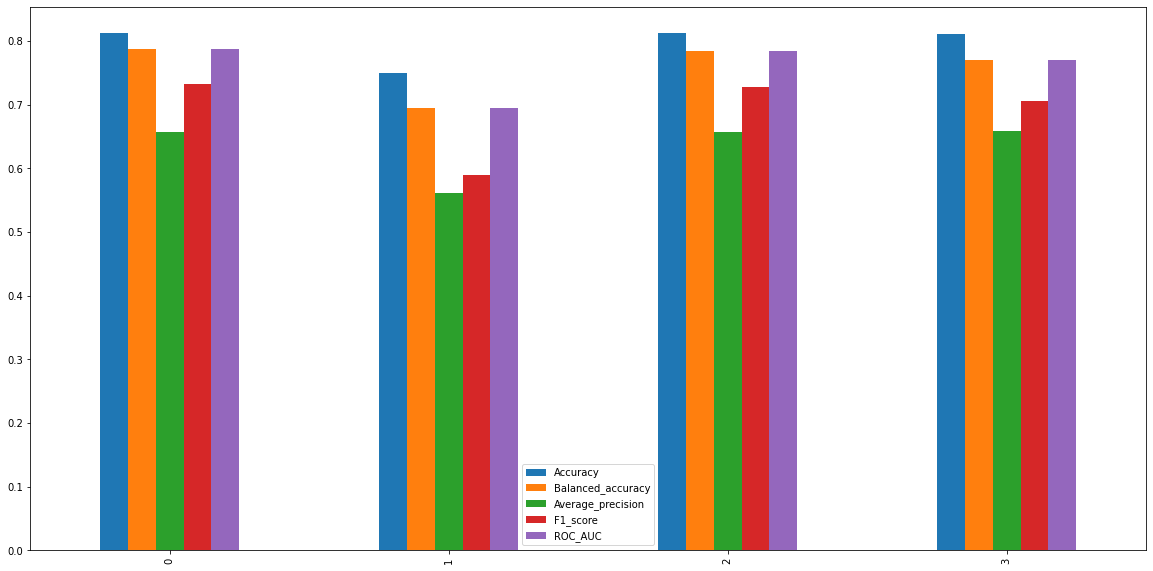

In [5]:
df.plot(kind='bar')

Text(0.5, 1.0, 'Accuracy')

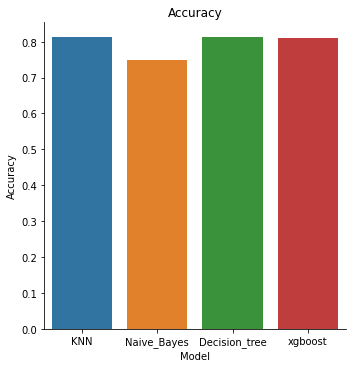

In [97]:
sns.catplot(x= 'Model', y="Accuracy", data = df,kind='bar')
plt.title('Accuracy')

Text(0.5, 1.0, 'Balanced_accuracy')

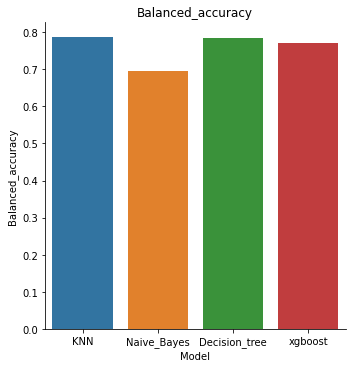

In [98]:
sns.catplot(x= 'Model', y="Balanced_accuracy", data = df,kind='bar')
plt.title('Balanced_accuracy')

Text(0.5, 1.0, 'Average_precision')

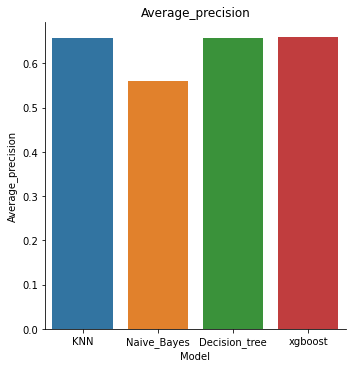

In [99]:
sns.catplot(x= 'Model', y="Average_precision", data = df,kind='bar')
plt.title('Average_precision')

Text(0.5, 1.0, 'F1_score')

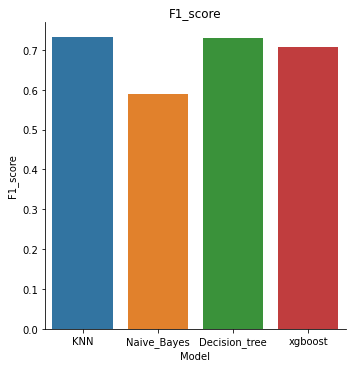

In [100]:
sns.catplot(x= 'Model', y="F1_score", data = df,kind='bar')
plt.title('F1_score')

Text(0.5, 1.0, 'ROC_AUC')

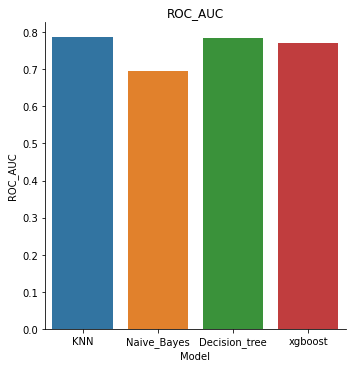

In [101]:
sns.catplot(x= 'Model', y="ROC_AUC", data = df,kind='bar')
plt.title('ROC_AUC')

Your answer to (b) here

In this case all the metrics are showing the same trend. If we consider the accuracy of random selection model as 0.5, all the models perform better than random slection model and KNN tops the list with an accuracy of 0.813

Your answer to (c) here

F1_score shows the maximum variation among the models so selecting it as the evaluation metric. If we consider F1_score as the evaluation metric then the following list rank the models with best model at teh top. 
* KNN
* Decission Tree
* xgboost
* Naive Bayes

### Question 4
Using your best overall model, plot the following:

#### (a)
Confusion Matrix (appropriate labels should be shown)

#### (b)
Precision Recall curve

#### (c)
ROC curve (Also show ROC for random classifier on the same plot)

In [105]:
y_pred = clf1_grid.predict(X_test)

In [113]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay

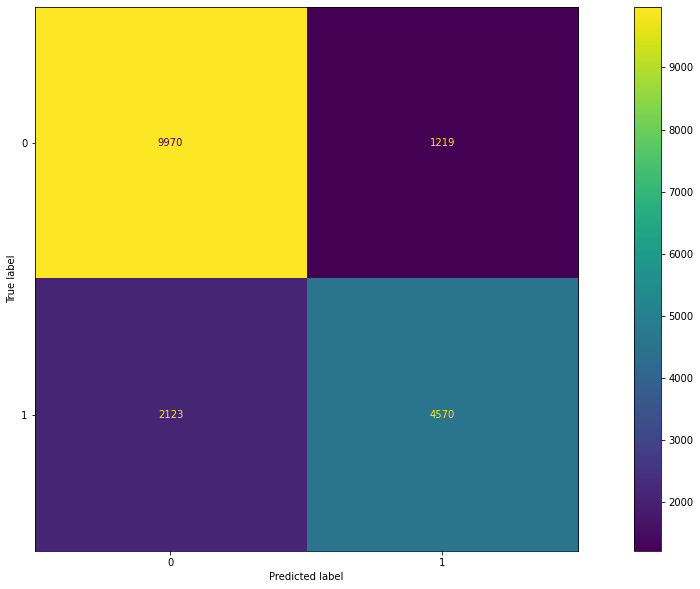

In [110]:
#code for a
matrix = confusion_matrix(y_test,y_pred) 
ConfusionMatrixDisplay(matrix).plot() 

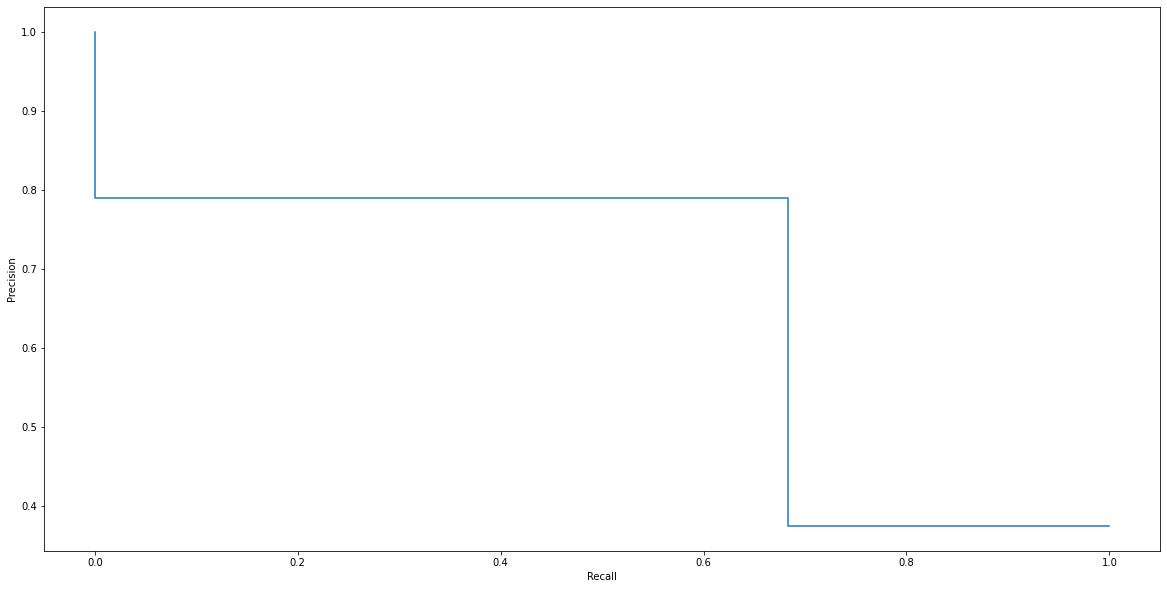

In [111]:
#code for b
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()            

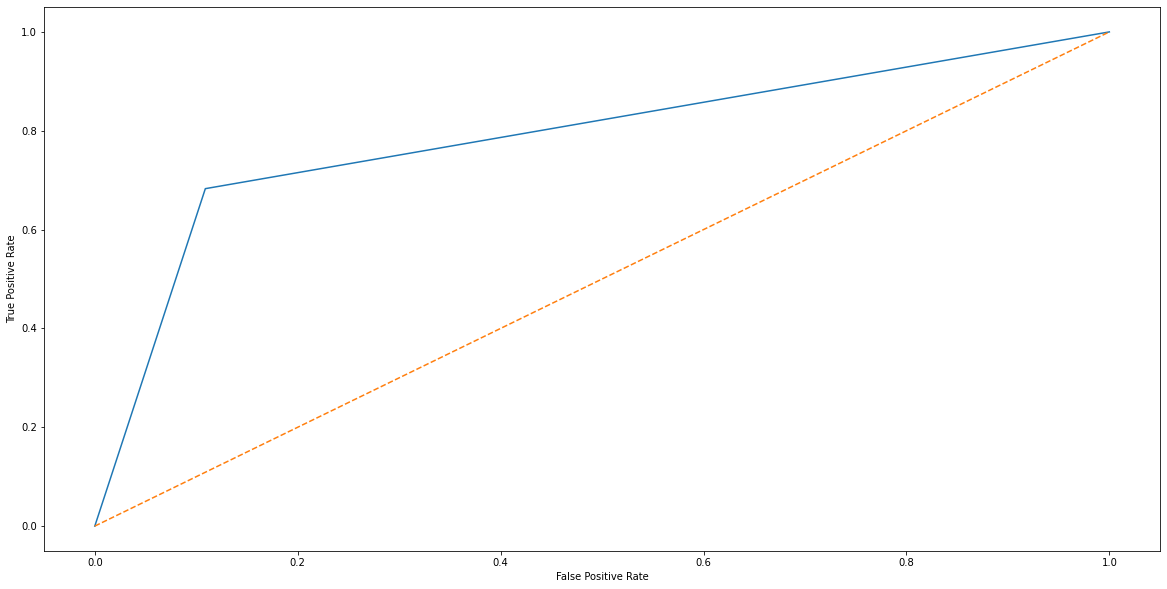

In [117]:
# code for c

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], linestyle = '--')